In [1]:
import pandas as pd
data = pd.read_excel("TAGS-NotDying4WallStreet - Archive.xlsx")

In [2]:
data.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1242483208484270080,DianaJManwaring,@joclap @TrumpWarRoom #notdying4wallstreet\n#A...,Tue Mar 24 16:07:35 +0000 2020,24/03/2020 16:07:35,NaN,NaN,47477632.0,joclap,202951147,1.242483e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/1134199157...,1756,2099.0,Central New York,http://twitter.com/DianaJManwaring/statuses/12...,"{""hashtags"":[{""text"":""notdying4wallstreet"",""in..."
1,1242483207636951045,amyzoeknapp,RT @gretchen0912: this is my mother. \nshe is ...,Tue Mar 24 16:07:35 +0000 2020,24/03/2020 16:07:35,NaN,NaN,NaN,NaN,1640642557,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://abs.twimg.com/sticky/default_profile_im...,43,342.0,"Dubuque, IA",http://twitter.com/amyzoeknapp/statuses/124248...,"{""hashtags"":[{""text"":""NotDying4WallStreet"",""in..."
2,1242483205531406337,DarlingNicki69,"RT @ActuallyJHT: If they silence Fauci, we nee...",Tue Mar 24 16:07:35 +0000 2020,24/03/2020 16:07:35,NaN,NaN,NaN,NaN,231677573,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/8541498667...,336,1112.0,"Baltimore, Maryland",http://twitter.com/DarlingNicki69/statuses/124...,"{""hashtags"":[{""text"":""NotDying4WallStreet"",""in..."
3,1242483204604518400,BearingLiberty,This whole #NotDying4WallStreet fad seems to e...,Tue Mar 24 16:07:34 +0000 2020,24/03/2020 16:07:34,NaN,NaN,NaN,NaN,1116744986526019584,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1116745418...,80,22.0,NaN,http://twitter.com/BearingLiberty/statuses/124...,"{""hashtags"":[{""text"":""NotDying4WallStreet"",""in..."
4,1242483204474335232,megan7oneill,RT @MSignorile: Lousiana now the third highest...,Tue Mar 24 16:07:34 +0000 2020,24/03/2020 16:07:34,NaN,NaN,NaN,NaN,758461284,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1140433947...,8821,9691.0,"Atascadero, CA",http://twitter.com/megan7oneill/statuses/12424...,"{""hashtags"":[{""text"":""COVID19"",""indices"":[71,7..."


In [3]:
import requests
import vaderSentiment 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
def analyze_sentiment(df):
    #initialize empty list 
    sentiments = []
    #initialize sentiment analyzer
    sid = SentimentIntensityAnalyzer()
    
    # df.shape[0] will count the number of rows. FYI df.shape[1] will count the number of columns.
    for i in range(df.shape[0]):
        # score each line of text with polarity scores
        line = df['text'].iloc[i]
        sentiment = sid.polarity_scores(line)
        # append sentiment scores for each line to new columns that are labeled according to the sentiment score labels from vader
        sentiments.append([sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']])
    # add this data to the data frame
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    #give each tweet an overall positive/negative label based on compound score thresholds
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1
    return df

In [5]:
data2 = analyze_sentiment(data)

In [6]:
data2['Neutral'] = (data2['Negative'] == "False") & (data2['Positive'] == "False")

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [7]:
data2

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_location,status_url,entities_str,neg,pos,neu,compound,Negative,Positive,Neutral
0,1242483208484270080,DianaJManwaring,@joclap @TrumpWarRoom #notdying4wallstreet\n#A...,Tue Mar 24 16:07:35 +0000 2020,24/03/2020 16:07:35,NaN,NaN,47477632.0,joclap,202951147,...,Central New York,http://twitter.com/DianaJManwaring/statuses/12...,"{""hashtags"":[{""text"":""notdying4wallstreet"",""in...",0.000,0.000,1.000,0.0000,False,False,False
1,1242483207636951045,amyzoeknapp,RT @gretchen0912: this is my mother. \nshe is ...,Tue Mar 24 16:07:35 +0000 2020,24/03/2020 16:07:35,NaN,NaN,NaN,NaN,1640642557,...,"Dubuque, IA",http://twitter.com/amyzoeknapp/statuses/124248...,"{""hashtags"":[{""text"":""NotDying4WallStreet"",""in...",0.000,0.251,0.749,0.8268,False,True,False
2,1242483205531406337,DarlingNicki69,"RT @ActuallyJHT: If they silence Fauci, we nee...",Tue Mar 24 16:07:35 +0000 2020,24/03/2020 16:07:35,NaN,NaN,NaN,NaN,231677573,...,"Baltimore, Maryland",http://twitter.com/DarlingNicki69/statuses/124...,"{""hashtags"":[{""text"":""NotDying4WallStreet"",""in...",0.054,0.000,0.946,-0.3412,True,False,False
3,1242483204604518400,BearingLiberty,This whole #NotDying4WallStreet fad seems to e...,Tue Mar 24 16:07:34 +0000 2020,24/03/2020 16:07:34,NaN,NaN,NaN,NaN,1116744986526019584,...,NaN,http://twitter.com/BearingLiberty/statuses/124...,"{""hashtags"":[{""text"":""NotDying4WallStreet"",""in...",0.300,0.070,0.630,-0.7351,True,False,False
4,1242483204474335232,megan7oneill,RT @MSignorile: Lousiana now the third highest...,Tue Mar 24 16:07:34 +0000 2020,24/03/2020 16:07:34,NaN,NaN,NaN,NaN,758461284,...,"Atascadero, CA",http://twitter.com/megan7oneill/statuses/12424...,"{""hashtags"":[{""text"":""COVID19"",""indices"":[71,7...",0.000,0.049,0.951,0.2235,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,1242474697071243265,Tigeroid,RT @threetails: #NotDying4WallStreet We need a...,Tue Mar 24 15:33:46 +0000 2020,24/03/2020 15:33:46,NaN,NaN,NaN,NaN,3634107257,...,NaN,http://twitter.com/Tigeroid/statuses/124247469...,"{""hashtags"":[{""text"":""NotDying4WallStreet"",""in...",0.169,0.066,0.765,-0.6093,True,False,False
9258,1242474696752287745,Can_ada,RT @Dona_Sweetly: @GOP @realDonaldTrump Transl...,Tue Mar 24 15:33:46 +0000 2020,24/03/2020 15:33:46,NaN,NaN,NaN,NaN,282894960,...,Canada,http://twitter.com/Can_ada/statuses/1242474696...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.153,0.032,0.815,-0.7077,True,False,False
9259,1242474696421126145,HaHornbek,RT @audeo03: Hey America. Remember the Death P...,Tue Mar 24 15:33:46 +0000 2020,24/03/2020 15:33:46,NaN,NaN,NaN,NaN,999656086360723456,...,"Buffalo, NY",http://twitter.com/HaHornbek/statuses/12424746...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.067,0.195,0.738,0.6902,False,True,False
9260,1242474695607218177,tksinclair,What does this mean? DONT LISTEN TO THE POTUS...,Tue Mar 24 15:33:46 +0000 2020,24/03/2020 15:33:46,NaN,NaN,NaN,NaN,14830388,...,S. California,http://twitter.com/tksinclair/statuses/1242474...,"{""hashtags"":[{""text"":""CoronavirusCoverup"",""ind...",0.243,0.000,0.757,-0.8833,True,False,False


In [ ]:
#analyze_sentiment(data).to_csv('NotDying4WallStreet.csv')

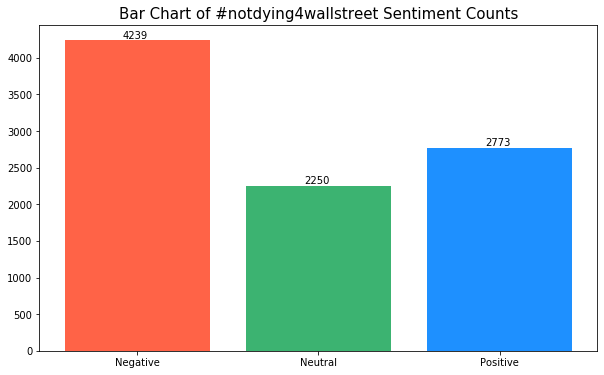

In [10]:
import matplotlib.pyplot as plt
# Values calculated in R 
sentiments = ['Negative', 'Neutral', 'Positive']
counts = [4239, 2250, 2773]
plt.subplots(figsize = (10, 6))
barplot = plt.bar(sentiments, counts, color = ['tomato', 'mediumseagreen', 'dodgerblue'])
for bar in barplot: 
    plt.text(bar.get_x() + bar.get_width() / 2.5, bar.get_height(), int(bar.get_height()), va = 'bottom')
plt.title("Bar Chart of #notdying4wallstreet Sentiment Counts", fontsize = 15)
plt.show()

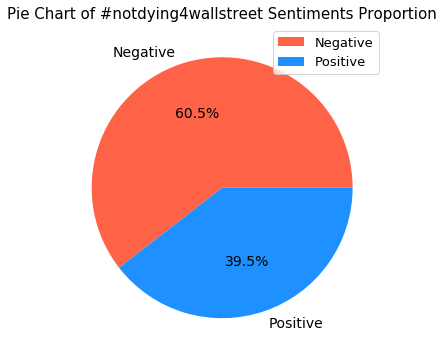

In [105]:
labels = ['Negative', 'Positive']
sizes = ["0.605", "0.395"]
plt.subplots(figsize = (10, 6))
plt.pie(sizes, labels = labels, autopct = "%.1f%%", colors = ['tomato', 'dodgerblue'], textprops={'fontsize': 14})
plt.legend(labels, loc = 'upper right')
plt.title("Pie Chart of #notdying4wallstreet Sentiments Proportion", fontsize = 15)
plt.show()

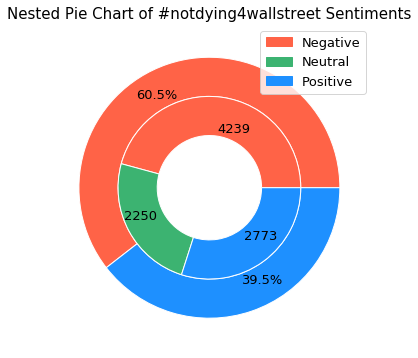

In [103]:
import numpy as np
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize = (10, 6)) 
plt.rcParams['font.size'] = 13.0
size = 0.3
#cm = plt.get_cmap("Pastel2")
outer_col = ['tomato', 'dodgerblue']
inner_col = ['tomato', 'mediumseagreen', 'dodgerblue']

ax.pie(sizes, radius = 1, colors = outer_col, wedgeprops = dict(width = size, edgecolor = 'w'), labels = ['60.5%', '39.5%'], labeldistance=0.75)
ax.pie(counts, radius = 1-size, colors = inner_col, wedgeprops = dict(width = size, edgecolor = 'w'), labels = counts, labeldistance=0.65)
neg = mpatches.Patch(color='tomato', label='Negative')
neu = mpatches.Patch(color='mediumseagreen', label='Neutral')
pos = mpatches.Patch(color='dodgerblue', label='Positive')
plt.legend(handles = [neg, neu, pos])
plt.title("Nested Pie Chart of #notdying4wallstreet Sentiments", fontsize = 15)
plt.show()

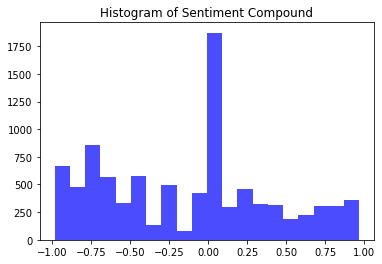

In [20]:
plt.hist(data.compound, bins = 20, facecolor = "blue", alpha = 0.7) 
plt.title("Histogram of Sentiment Compound")
plt.show()